# Desafio de regressão Quinto Andar

### 1 - EDA and data wrangling

In [1]:
#Importar as bibliotecas mais relevantes para a análise
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
#Janitor muito utilizado para acertar limpar onome das variáveis
import janitor
#Vamos transformar as variáveis categoricas escritas em números utilizando o category_encoders
from sklearn.preprocessing import OrdinalEncoder
#importar biblioteca warning para esconder os alertas mostrados na tela
import warnings
warnings.filterwarnings("ignore")
#Alterar linhas e colonas de visualização do pandas
pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)

In [2]:
# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
    mean_y = np.mean(y)
    mean_pred = np.mean(y_pred)

    rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)

    report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
    })

    report[dataset_name] = report[dataset_name].round(2)
    return report

In [3]:
#importar o dataset utilizando o pandas read_csv e o janitor clean_names para formatar os nomes das variáveis
dataset = pd.read_csv('data/base.csv').clean_names()
dataset.drop(columns='id', inplace=True)

In [4]:
#apenas uma visualização do dataset utilizando o head
dataset.head()

,classeimovel,classezona,fachada,tamanholote,rua,beco,formaprop,planoprop,servicos,configlote,inclinacaolote,bairro,estrada1,estrada2,tipohabitacao,estilohabitacao,qualidade,condicao,anoconstrucao,anoreforma,tipotelhado,materialtelhado,exterior1,exterior2,tipoalvenaria,areaalvenaria,qualidadecobertura,condicaoexterna,tipofundacao,alturaporao,condicaoporao,paredeporao,tipoacabporao1,areaacabporao1,tipoacabporao2,areaacabporao2,areainacabporao,areaporao,aquecimento,qualidadeaquecimento,arcentral,instalacaoeletrica,areaterreo,area2andar,baixaqualiareaacab,areaconstruida,banheiroporao,lavaboporao,banheiro,lavabo,bedroomabvgr,kitchenabvgr,qualidadecozinha,totalquartos,funcionalidade,lareira,qualdiadelareira,localgaragem,anogaragem,acabamentogaragem,carrosgaragem,areagaragem,qualidadegaragem,condicaogaragem,entradapavimentada,areadeck,areavarandaaberta,areavarandafechada,areavaranda3estacoes,areaalpendre,areapiscina,qualidadepiscina,qualidadecerca,outros,valoroutros,mesvenda,anovenda,tipovenda,condicaovenda,precovenda
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#visualizar informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   classeimovel          1460 non-null   int64  
 1   classezona            1460 non-null   object 
 2   fachada               1201 non-null   float64
 3   tamanholote           1460 non-null   int64  
 4   rua                   1460 non-null   object 
 5   beco                  91 non-null     object 
 6   formaprop             1460 non-null   object 
 7   planoprop             1460 non-null   object 
 8   servicos              1460 non-null   object 
 9   configlote            1460 non-null   object 
 10  inclinacaolote        1460 non-null   object 
 11  bairro                1460 non-null   object 
 12  estrada1              1460 non-null   object 
 13  estrada2              1460 non-null   object 
 14  tipohabitacao         1460 non-null   object 
 15  estilohabitacao      

In [6]:
#vamos criar 3 variaveis tipo lista, de acordo com o tipo delas
categorical_variables = ['classeimovel', 'classezona', 'rua', 'beco', 'formaprop', 'planoprop', 'servicos', 'configlote', 'inclinacaolote',
       'bairro', 'estrada1', 'estrada2', 'tipohabitacao', 'estilohabitacao', 'qualidade', 'condicao', 'tipotelhado',
       'materialtelhado', 'exterior1', 'exterior2', 'tipoalvenaria', 'qualidadecobertura', 'condicaoexterna',
       'tipofundacao', 'alturaporao', 'condicaoporao', 'paredeporao', 'tipoacabporao1','tipoacabporao2',
       'aquecimento', 'qualidadeaquecimento', 'arcentral', 'instalacaoeletrica','banheiroporao', 'lavaboporao',
       'banheiro', 'lavabo', 'bedroomabvgr', 'kitchenabvgr', 'qualidadecozinha', 'totalquartos', 'funcionalidade', 'lareira',
       'qualdiadelareira', 'localgaragem', 'acabamentogaragem','carrosgaragem', 'qualidadegaragem', 'condicaogaragem',
       'entradapavimentada', 'qualidadepiscina', 'qualidadecerca', 'outros', 'tipovenda', 'condicaovenda']

numeric_variables = ['tamanholote', 'areaacabporao1','areaacabporao2', 'areainacabporao', 'areaporao', 'areaterreo',
       'area2andar', 'baixaqualiareaacab', 'areaconstruida', 'areagaragem', 'areadeck', 'areavarandaaberta','areaalvenaria',
       'areavarandafechada', 'areavaranda3estacoes', 'areaalpendre', 'areapiscina', 'valoroutros','fachada','precovenda']
date_variables = ['anoconstrucao', 'anoreforma', 'mesvenda', 'anovenda']

In [7]:
#vamos analizar quantos porcento tenha de nulo em cada uma das features
dataset.isnull().mean()[dataset.isnull().mean() !=0]*100

fachada               17.739726
beco                  93.767123
tipoalvenaria          0.547945
areaalvenaria          0.547945
alturaporao            2.534247
condicaoporao          2.534247
paredeporao            2.602740
tipoacabporao1         2.534247
tipoacabporao2         2.602740
instalacaoeletrica     0.068493
qualdiadelareira      47.260274
localgaragem           5.547945
anogaragem             5.547945
acabamentogaragem      5.547945
qualidadegaragem       5.547945
condicaogaragem        5.547945
qualidadepiscina      99.520548
qualidadecerca        80.753425
outros                96.301370
dtype: float64

In [8]:
#aqui iremos criar uma variável dos features que contém nulos
variables_null = ['alturaporao', 'condicaoporao', 'paredeporao', 'tipoacabporao1', 'tipoacabporao2', 'instalacaoeletrica',
                  'localgaragem', 'anogaragem', 'acabamentogaragem', 'qualidadegaragem', 'condicaogaragem']

In [9]:
#Para as variáveis categorias o dicionario nos diz que quando temos NA significa que não tem o item e como iremos utilizar
#o encoder, vamos trocar NA por 0 e para as variáveis numericas iremos adotar a zero para areaalvenaria, 
#média para fachada e moda para tipodealvenaria
dataset['areaalvenaria'].fillna(value=0, inplace=True)
dataset['fachada'].fillna(value=round(dataset['fachada'].mean(),2), inplace= True)
dataset['tipoalvenaria'].fillna(value=dataset['tipoalvenaria'].mode()[0], inplace=True)
[dataset[value].fillna(value='0', inplace=True) for value in variables_null]


#as variáveis  beco, qualidadepiscina, qualidadecerca, outros, qualdiadelareira por ter muitos valores faltantes, optei 
#por remover a varivel entendendo que pela proposção de faltantes, não conseguireri adotar um valor próximo da realidade
dataset.drop(columns=['beco', 'qualidadepiscina', 'qualidadecerca', 'outros', 'qualdiadelareira'], inplace = True)

In [10]:
#Como algumas features foram removidas, vou ajustar minha variável categorica
[categorical_variables.remove(value) for value in ['beco', 'qualidadepiscina', 'qualidadecerca', 'outros',
                                                   'qualdiadelareira']]
categorical_variables.sort()

In [11]:
#Para cada tipo de variavel vamos mudar o tipo utilizando o astype
for values in date_variables:
    dataset[values] = dataset[values].astype('int64')
for values in numeric_variables:
    dataset[values] = dataset[values].astype('float64')
for values in categorical_variables:
    dataset[values] = dataset[values].astype('category')

In [12]:
#vamos utilizar o Ordinalencoder para fitar as variáveis categoricas escritas em números
dataset[categorical_variables]= OrdinalEncoder().fit_transform(dataset[categorical_variables])

In [13]:
#depois de tratado os valores nulos, vamos checar se ainda tenho valores nulos
dataset.isnull().sum().sum()

0

<BarContainer object of 29 artists>

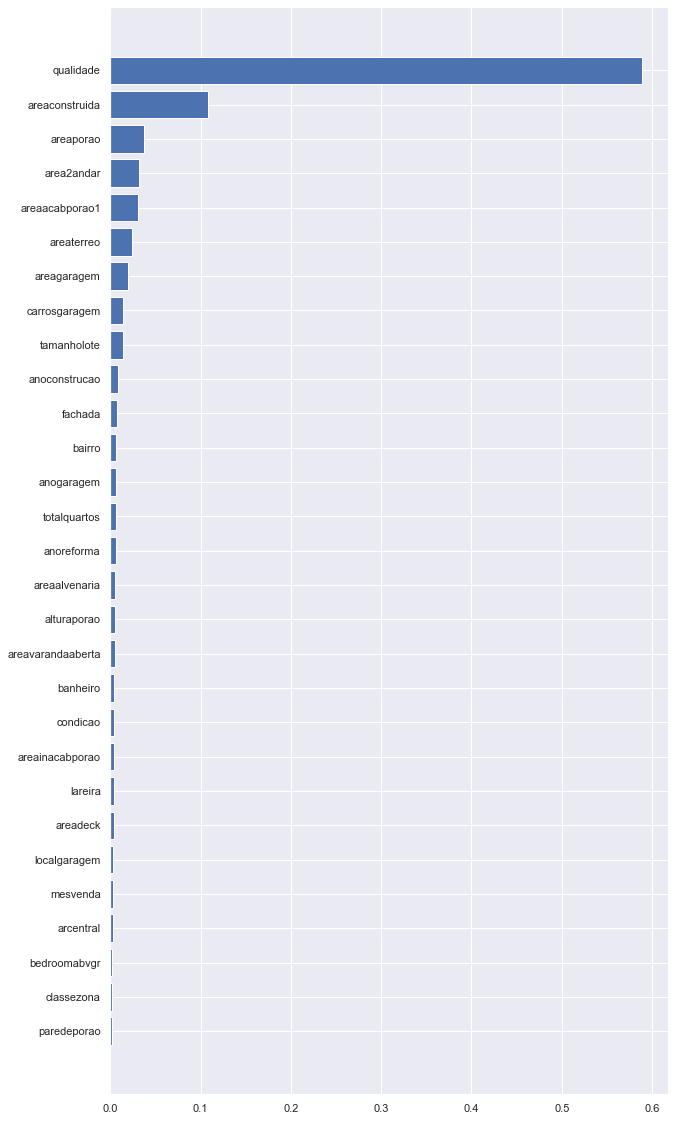

In [14]:
#Utilizando o Random Forest vamos fazer um feature selection para selecionarmos as variáveis mais relevantes
y = (dataset.precovenda)
X = (dataset.drop(columns='precovenda'))
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
#Criaremos uma variável considerando as top 30 features de maior importância na predição e plotá-las
most_relevant_features = pd.DataFrame(rf.feature_importances_, X.columns).reset_index().\
                        rename(columns={'index':'features', 0:'score'})
most_relevant_features = most_relevant_features.nlargest(29, 'score').sort_values(by='score', ascending = True)
sns.set_theme()
plt.figure(figsize=(10,20))
plt.barh(most_relevant_features.features, most_relevant_features.score)

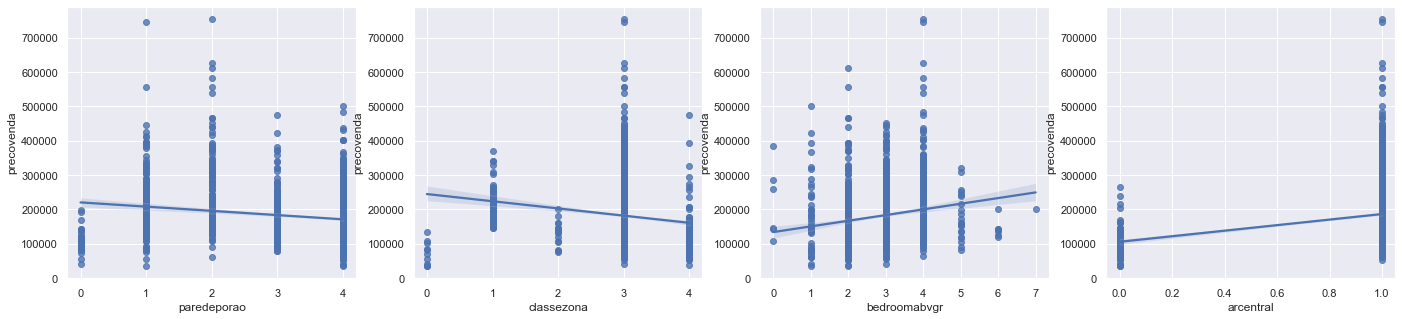

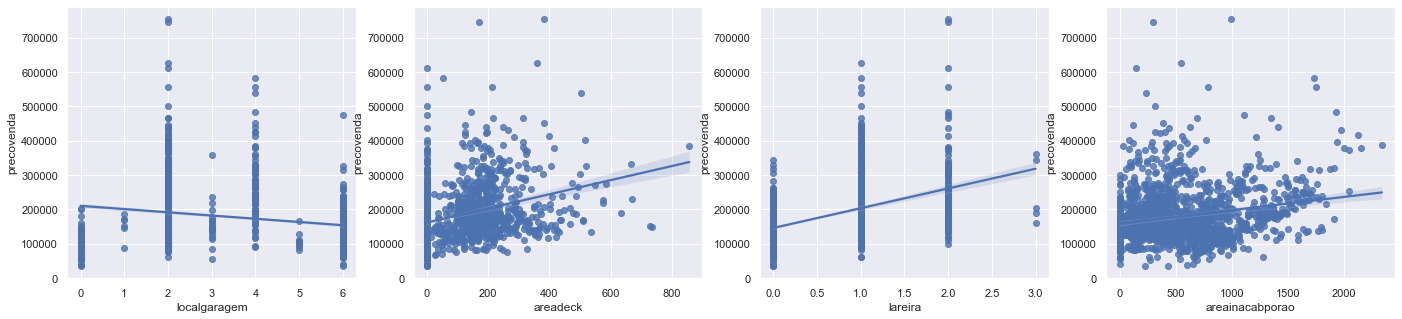

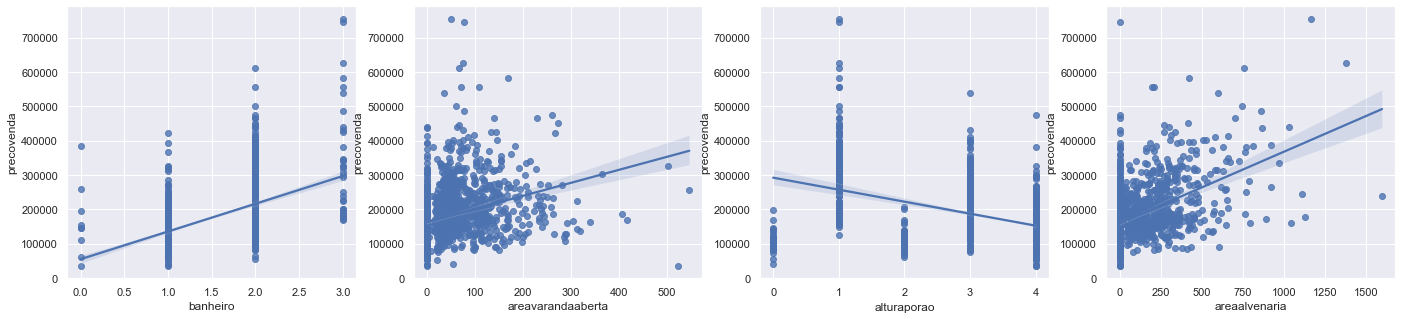

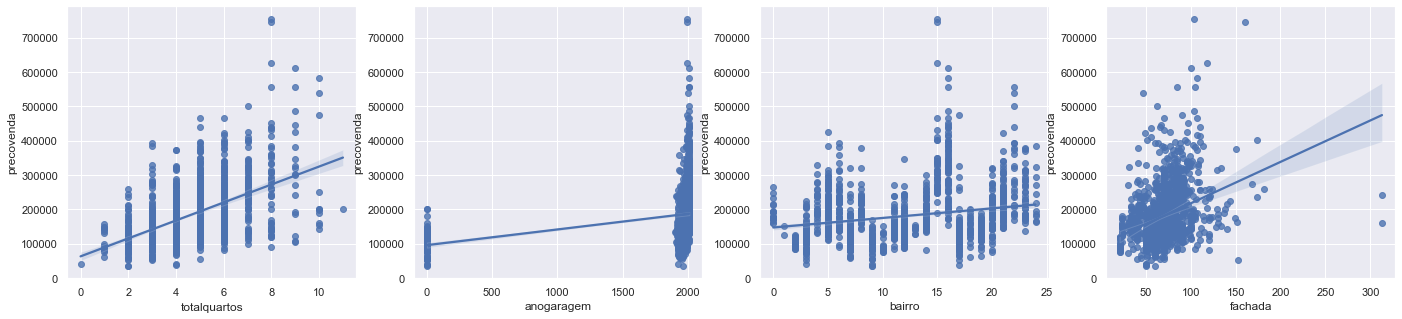

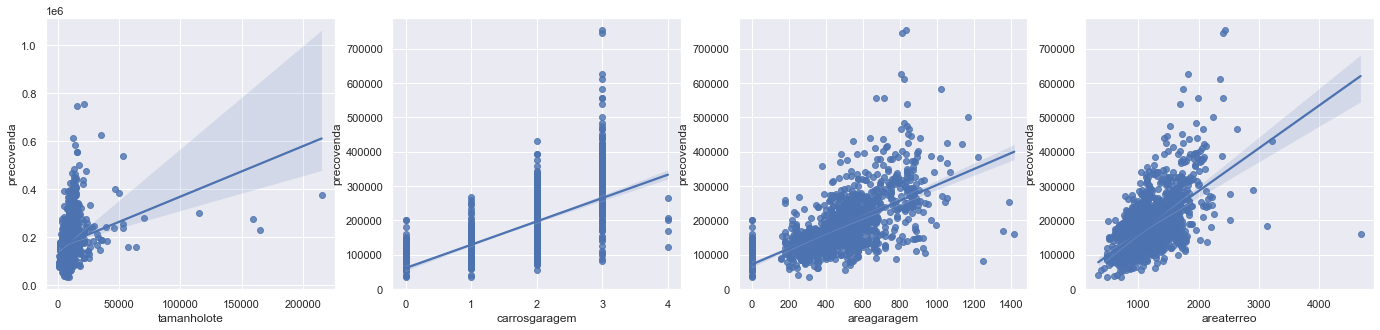

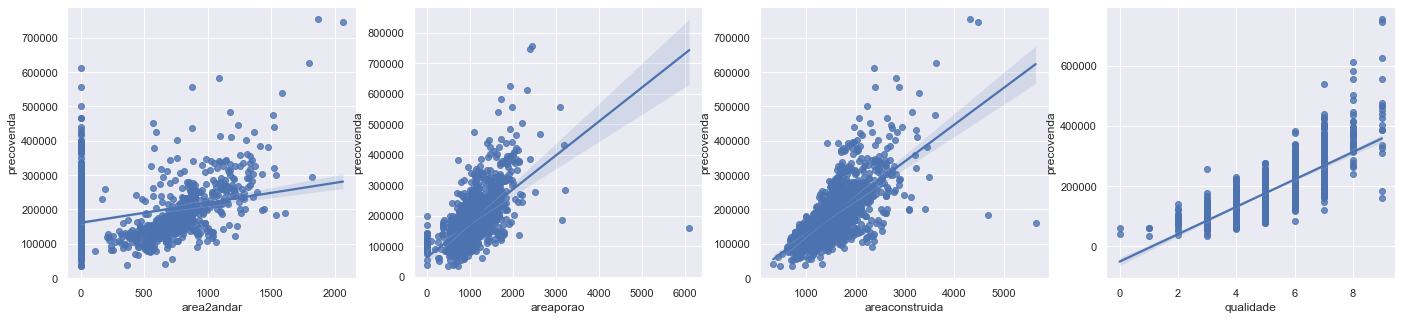

In [15]:
#utilizando seaborn e regplot, vamos plotar as variaveis encontradas mais relevantes pelo randomforest em função do preço
#assim conseguimos analisar a tendencia de cada uma delas
sns.set_theme()
dataset[most_relevant_features['features']]= np.int64(dataset[most_relevant_features['features']])
fig = plt.subplots(figsize = (30,5))
for i, value in enumerate(most_relevant_features['features'][0:4], start=1):
    fig = plt.subplot(1,5,i)
    ax = sns.regplot(data=dataset, x = value,y='precovenda')
plt.subplots(figsize = (30,5))
for i, value in enumerate(most_relevant_features['features'][5:9], start=1):
    plt.subplot(1,5,i)
    sns.regplot(data=dataset, x = value,y='precovenda')
plt.subplots(figsize = (30,5))
for i, value in enumerate(most_relevant_features['features'][10:14], start=1):
    plt.subplot(1,5,i)
    sns.regplot(data=dataset, x = value,y='precovenda')
plt.subplots(figsize = (30,5))
for i, value in enumerate(most_relevant_features['features'][15:19], start=1):
    plt.subplot(1,5,i)
    sns.regplot(data=dataset, x = value,y='precovenda')
plt.subplots(figsize = (30,5))
for i, value in enumerate(most_relevant_features['features'][20:24], start=1):
    plt.subplot(1,5,i)
    sns.regplot(data=dataset, x = value,y='precovenda')
plt.subplots(figsize = (30,5))
for i, value in enumerate(most_relevant_features['features'][25:29], start=1):
    plt.subplot(1,5,i)
    sns.regplot(data=dataset, x = value,y='precovenda')

In [16]:
#Vamos construir um dataset suporte para as features que selecionei como mais relevantes e adicionar 1 features engineering
new_dataset = dataset[list(most_relevant_features.features.values)+['precovenda']]
new_dataset['precoporarea'] = new_dataset['precovenda']/new_dataset['areaconstruida']

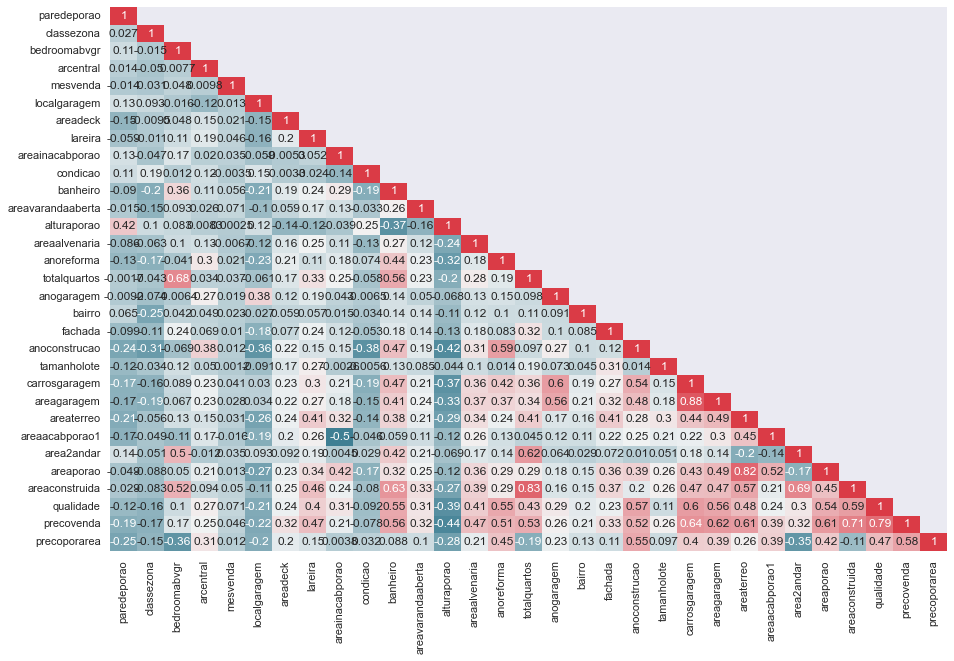

In [17]:
#utilizando a função de correlação e o heatmap do seaborn, vamos plotar um mapa de correlação para vermos as relevancias
#entre as variáveis
plt.figure(figsize=(15,10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(new_dataset.corr(), dtype=np.bool),1)

ax = sns.heatmap(new_dataset.corr(),
                 annot=True, cmap = cmap,cbar=False, mask = mask)

Text(0.0, 1.0, 'Média dos preços das casas')

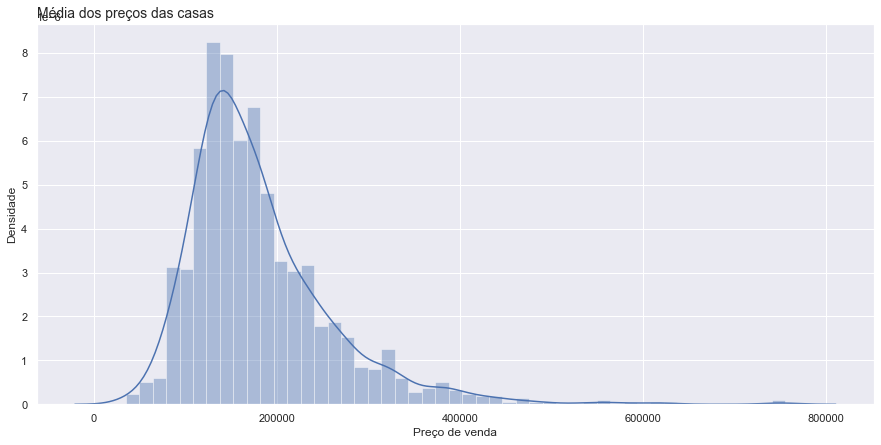

In [18]:
#Aqui iremos plotar um histograma do preço dos imóveis
sns.set_theme()
plt.figure(figsize=(15,7))
ax= sns.distplot(dataset['precovenda'])
ax.set(xlabel='Preço de venda', ylabel= 'Densidade')
ax.set_title('Média dos preços das casas', loc = 'left', fontsize = 14)

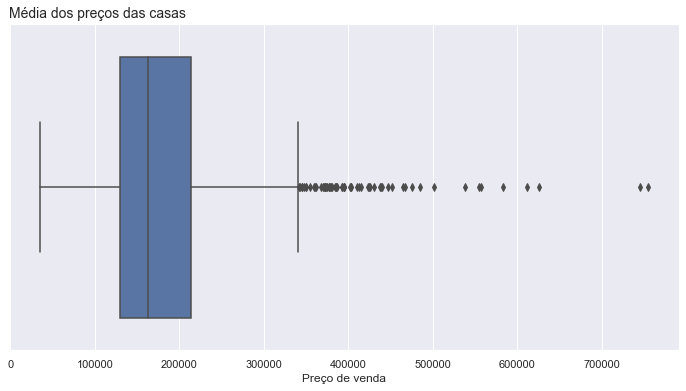

In [19]:
#Aqui iremos plotar um boxplot do preço dos imóveis
ax = sns.boxplot(dataset['precovenda'])
ax.set_title('Média dos preços das casas', loc = 'left', fontsize = 14)
ax.set(xlabel='Preço de venda')
ax.figure.set_size_inches(12,6)

In [20]:
#Estatística descritiva dos preços das casas
new_dataset.describe(percentiles=(0.25,0.50,0.75,0.95,0.99))

,paredeporao,classezona,bedroomabvgr,arcentral,mesvenda,localgaragem,areadeck,lareira,areainacabporao,condicao,banheiro,areavarandaaberta,alturaporao,areaalvenaria,anoreforma,totalquartos,anogaragem,bairro,fachada,anoconstrucao,tamanholote,carrosgaragem,areagaragem,areaterreo,areaacabporao1,area2andar,areaporao,areaconstruida,qualidade,precovenda,precoporarea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,3.180137,3.028767,2.865753,0.934932,6.321918,3.097260,94.244521,0.613014,567.240411,4.575342,1.565068,46.660274,3.178767,103.117123,1984.865753,4.517123,1868.739726,12.251370,70.041096,1971.267808,10516.828082,1.767123,472.980137,1162.626712,443.639726,346.992466,1057.429452,1515.463699,5.099315,180921.195890,120.572878
std,1.246138,0.632017,0.811875,0.246731,2.703626,1.890815,125.338794,0.644666,441.866955,1.112799,0.550916,66.256028,0.998402,180.731373,20.645407,1.622446,453.697295,6.013735,22.024031,30.202904,9981.264932,0.747315,213.804841,386.587738,456.098091,436.528436,438.705324,525.480383,1.382997,79442.502883,31.391081
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,0.000000,0.000000,21.000000,1872.000000,1300.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,334.000000,0.000000,34900.000000,28.358738
25%,2.000000,3.000000,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,223.000000,4.000000,1.000000,0.000000,3.000000,0.000000,1967.000000,3.000000,1958.000000,7.000000,60.000000,1954.000000,7553.500000,1.000000,334.500000,882.000000,0.000000,0.000000,795.750000,1129.500000,4.000000,129975.000000,99.822008
50%,4.000000,3.000000,3.000000,1.000000,6.000000,2.000000,0.000000,1.000000,477.500000,4.000000,2.000000,25.000000,3.000000,0.000000,1994.000000,4.000000,1977.000000,12.000000,70.000000,1973.000000,9478.500000,2.000000,480.000000,1087.000000,383.500000,0.000000,991.500000,1464.000000,5.000000,163000.000000,120.099031
75%,4.000000,3.000000,3.000000,1.000000,8.000000,6.000000,168.000000,1.000000,808.000000,5.000000,2.000000,68.000000,4.000000,164.250000,2004.000000,5.000000,2001.000000,17.000000,79.000000,2000.000000,11601.500000,2.000000,576.000000,1391.250000,712.250000,728.000000,1298.250000,1776.750000,6.000000,214000.000000,138.700041
95%,4.000000,4.000000,4.000000,1.000000,11.000000,6.000000,335.000000,2.000000,1468.000000,7.000000,2.000000,175.050000,4.000000,456.000000,2007.000000,8.000000,2007.000000,22.000000,104.000000,2007.000000,17401.150000,3.000000,850.100000,1831.250000,1274.000000,1141.050000,1753.000000,2466.100000,7.000000,326100.000000,174.362713
99%,4.000000,4.000000,5.000000,1.000000,12.000000,6.000000,505.460000,2.000000,1797.050000,8.000000,3.000000,285.820000,4.000000,791.280000,2009.000000,9.000000,2009.000000,23.000000,137.410000,2009.000000,37567.640000,3.000000,1002.790000,2219.460000,1572.410000,1418.920000,2155.050000,3123.480000,9.000000,442567.010000,205.201937
max,4.000000,4.000000,7.000000,1.000000,12.000000,6.000000,857.000000,3.000000,2336.000000,8.000000,3.000000,547.000000,4.000000,1600.000000,2010.000000,11.000000,2010.000000,24.000000,313.000000,2010.000000,215245.000000,4.000000,1418.000000,4692.000000,5644.000000,2065.000000,6110.000000,5642.000000,9.000000,755000.000000,276.250881


In [21]:
#Filtro considerando os preços das casas entre 99% percentile
new_dataset = new_dataset[new_dataset.precovenda <=450000]

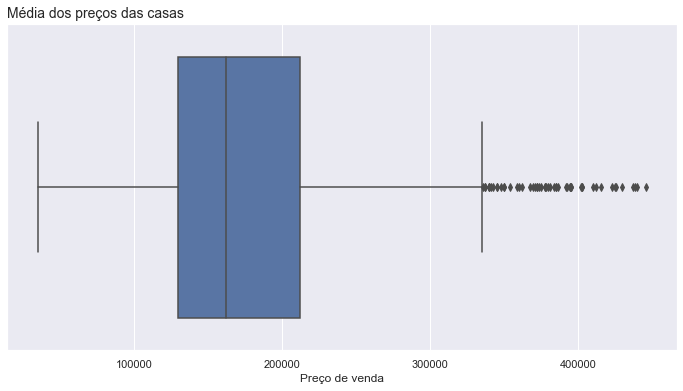

In [22]:
#Visualizando a nova distribuição
#Aqui iremos plotar um boxplot do preço dos imóveis
ax = sns.boxplot(new_dataset['precovenda'])
ax.set_title('Média dos preços das casas', loc = 'left', fontsize = 14)
ax.set(xlabel='Preço de venda')
ax.figure.set_size_inches(12,6)

<b>Conclusão Primeira parte:</b><br>
- Primeira análise dos valores nulos, pelo próprio dicionário dos dados tinhamos que os valores NA significavam que não tinham, por exemplo, quando mencionava piscina e não tinha era colocado NA, com isso todos NA eu considerei como 0.<br>
- Segunda análise valores nulos de 50% acima, foi deletada a feature entendendo que qualquer valor que considerasse seria  inválido devio ao alto indice de valores nulos.<br>
- Terceira análise das variáveis mais relevantes através de features selection utilizando o random forest, e com isso cheguei na conclusão criei um novo dataset considerando as 30 features mais relevantes<br>
- Ao plotar o histograma vimos que o preço dos imóveis é uma curva com cauda para a direita ou assimetrica positiva, com isso irei aplicar o log na variavel precovenda para ver a resposta<br>
- Na análise descritiva, vemos que algumas casas estão com preço bem acima do padrão (podem ser casas de alto padrão porém podem influenciar na análise), considerando que 99% percentil está abaixo de $450,000.00, vamos fazer uma query considerando os valores entre esse valor abaixo<br>
- Foi criado uma feature engineering, preço/área

Text(0.0, 1.0, 'Média dos preços das casas')

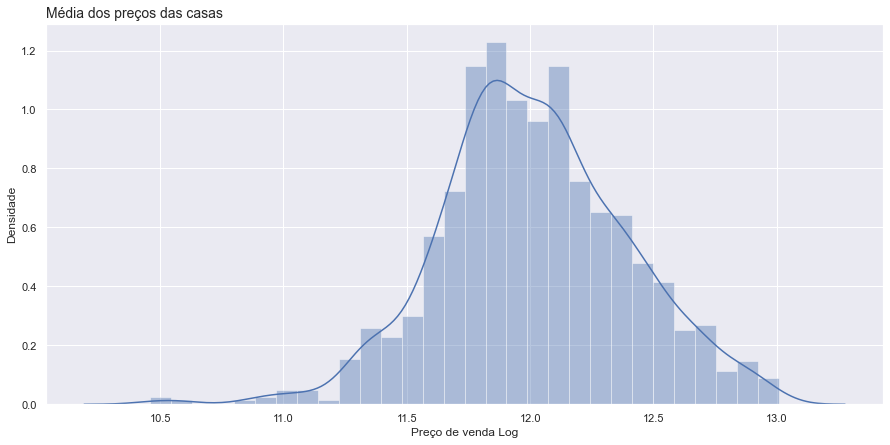

In [23]:
#Vamos aplicar logaritimo na variável de preço e vere qual o comportamento da curva após a modificação
new_dataset['precovenda_log'] = np.log(new_dataset['precovenda'])
#Aqui iremos plotar um histograma do preço dos imóveis logarítimo
sns.set_theme()
plt.figure(figsize=(15,7))
ax= sns.distplot(new_dataset['precovenda_log'])
ax.set(xlabel='Preço de venda Log', ylabel= 'Densidade')
ax.set_title('Média dos preços das casas', loc = 'left', fontsize = 14)

<b>Conclusão:</b><br>
- Com a transformação logarítmica, podemos ver que a distribuição ficou normalmente distribuida

In [24]:
#Vamos ver as top 5 features de acordo com o randomforest
most_relevant_features.sort_values(by='score',ascending=False).head(5).features.values

array(['qualidade', 'areaconstruida', 'areaporao', 'area2andar',
       'areaacabporao1'], dtype=object)

In [25]:
#Aqui iremos fazer uma primeira regressão para avaliarmos o comportamento dos resultados considerando as Top 10 baseado no 
#resultado do randomforest.
colunas_regressao =  'precovenda_log ~ qualidade + areaconstruida + totalquartos + lareira + banheiro'
dataset_regressao= new_dataset[['precovenda_log','qualidade', 'areaconstruida', 'totalquartos', 'lareira',
       'banheiro']]

In [26]:
#Criando uma regressão simples com o statsmodels para avaliar a performance das variaveis
modelo = smf.ols(colunas_regressao, data = dataset_regressao).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         precovenda_log   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     810.3
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        10:59:04   Log-Likelihood:                 303.25
No. Observations:                1446   AIC:                            -594.5
Df Residuals:                    1440   BIC:                            -562.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.7726      0.022    490.319      0.000      10.729      10.816
qualidade          0.1611      0.005     31.987      0.000       0.151       0.171
areaconstruida     0.0002   2.18e-05      8.955      0.000       0.000       0.000
totalquartos      -0.0065      0.006     -1.103      0.270      -0.018       0.005
lareira            0.0790      0.009      8.523      0.000       0.061       0.097
banheiro           0.0722      0.013      5.640      0.000       0.047       0.097
==============================================================================
Omnibus:                      434.299   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2540.158
Skew:                          -1.269   Prob(JB):                         0.00
Kurtosis:                       8.977   Cond. No.                     6.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

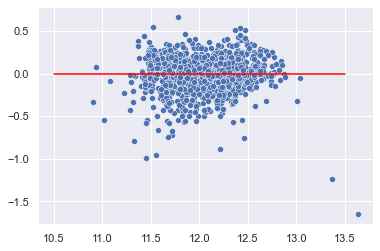

In [27]:
#Distribuição dos resíduo em função da predição
ax = sns.scatterplot(y = modelo.resid, x= modelo.predict(dataset_regressao))
ax = sns.lineplot(x = [10.5,13.5], y = [0,0], color = 'red')

<AxesSubplot:ylabel='Count'>

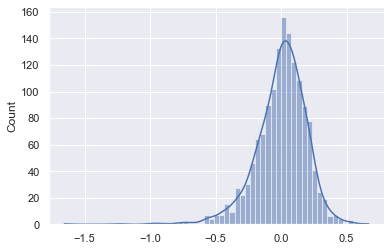

In [28]:
sns.histplot(modelo.resid, kde=True)

In [29]:
#Analisando os parametros
pd.DataFrame(round((np.exp(modelo.params[1:]) - 1)*100, 2), columns=['betas'])

,betas
qualidade,17.49
areaconstruida,0.02
totalquartos,-0.65
lareira,8.22
banheiro,7.48


<b>Resíduos:</b><br>
Temos os resíduos em função dos valores estimados. Podemos observar a independência e a homocedasticidade, que os resíduos se distribuem de maneira razoavelmente aleatória e com mesma amplitude em torno do zero.<br>
<b>Coeficientes:</b><br>
Para cada 1 unidade que os coeficientes aumentam temos o incremento em proporção, por exemplo "arcentral" para cada 1 unidade ele aumenta em 9,93% do valor do imóvel.<br>
<b>R^2:</b><br>
Temos um R^2 de 0.943 e o ajustado também de 0.943 significa que as variáveis explicativas se ajustam a linha de regressão.<br>
<b>Durbin-Watson</b><br>
Ainda uma outra análise de Durbin-Watson, O teste de Durbin-Watson mede a autocorrelação em resíduos de uma análise de regressão em uma escala de 0 a 4. Nesta escala, 0 a 2 é autocorrelação positiva, 2 não é autocorrelação e 2 a 4 é autocorrelação negativa.No nosso caso muito próximo de 2 o que significa que não temos autocorrelação dos resíduos.

In [85]:
#Pre-processamento dos datasets de treino, teste e validação
X = dataset.drop(columns=('precovenda'))
y = dataset.precovenda
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=42)
X_validacao, X_test, y_validacao, y_test = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [86]:
#Fitando o modelo e imprimindo os metricos
regressor = RandomForestRegressor(n_estimators=150)
regressor.fit(X_train,y_train)
baseline_report = metrics_report(y_validacao, regressor.predict(X_validacao), 'validation')
baseline_report

,metric,validation
0,RMSE,24218.95
1,MAE,15706.92
2,R^2,0.90
3,MAPE,0.10
4,Avg. target,182764.72
5,Avg. Prediction,182955.51


In [87]:
#Looping para encontrarmos o melhor hiperparametro n_estimator
dic_n_estimator = {}
for n in [10, 30, 50, 70, 100, 150, 200]:
    modelo = RandomForestRegressor(n_estimators=n, random_state=42)
    modelo.fit(X_train, y_train)
    y_val_pred = modelo.predict(X_validacao)
    rmse = math.sqrt(mean_squared_error(y_validacao, y_val_pred))
    dic_n_estimator[n] = rmse
for i in dic_n_estimator:
    if dic_n_estimator[i]==min(dic_n_estimator.values()):
        best_n_estimator = i

In [88]:
#Looping para encontrarmos o melhor hiperparametro max_features
dic_max_features={}
for max_features in [0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8]:
    modelo = RandomForestRegressor(n_estimators=best_n_estimator, max_features=max_features, random_state=42)
    modelo.fit(X_train, y_train)
    y_val_pred = modelo.predict(X_validacao)
    rmse = math.sqrt(mean_squared_error(y_validacao, y_val_pred))
    dic_max_features[max_features] = rmse
for i in dic_max_features:
    if dic_max_features[i]==min(dic_max_features.values()):
        best_max_feature = i

In [89]:
#Looping para encontrarmos o melhor hiperparametro min_samples
dic_min_samples_leaf = {}
for min_samples_leaf in list(range(1,8)):
    modelo = RandomForestRegressor(n_estimators=best_n_estimator, max_features=best_max_feature, min_samples_leaf= min_samples_leaf, random_state=42)
    modelo.fit(X_train, y_train)
    y_val_pred = modelo.predict(X_validacao)
    rmse = math.sqrt(mean_squared_error(y_validacao, y_val_pred))
    dic_min_samples_leaf[min_samples_leaf] = rmse
for i in dic_min_samples_leaf:
    if dic_min_samples_leaf[i]==min(dic_min_samples_leaf.values()):
        best_min_sample_leaf = i

In [90]:
#Refazendo a regressão com os melhores hiperparâmetros, n_estimators=50, max_features=0.6, min_samples_leaf=4
regressor = RandomForestRegressor(n_estimators=best_n_estimator, max_features=best_max_feature, 
                                  min_samples_leaf= best_min_sample_leaf, random_state=42)
regressor.fit(X_train,y_train)
baseline_report = metrics_report(y_validacao, regressor.predict(X_validacao), 'validation')
baseline_report

,metric,validation
0,RMSE,22345.75
1,MAE,15300.65
2,R^2,0.92
3,MAPE,0.10
4,Avg. target,182764.72
5,Avg. Prediction,183706.84


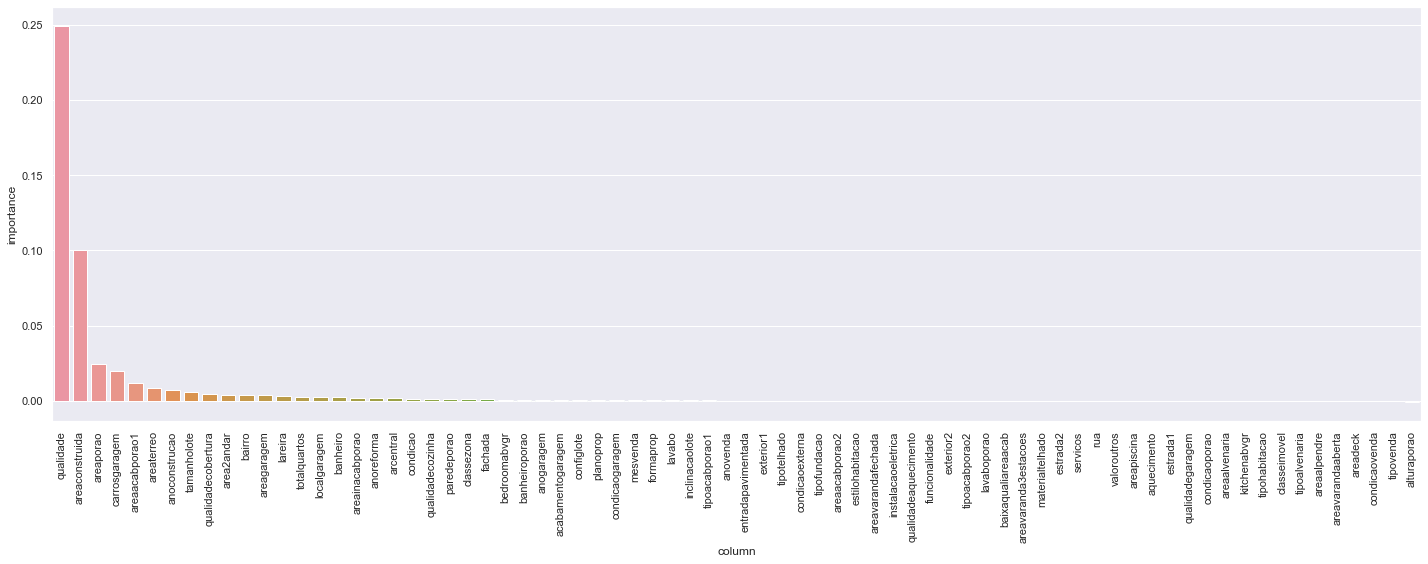

In [91]:
# Importância das features, removendo variáveis pouco importantes e plotando por grau de importancia
permutation_result = permutation_importance(regressor, X_validacao, y_validacao, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_validacao.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [92]:
# Pegando as features mais importantes
best_features = list(importances.nlargest(40, 'importance').column)
print(best_features)

['qualidade', 'areaconstruida', 'areaporao', 'carrosgaragem', 'areaacabporao1', 'areaterreo', 'anoconstrucao', 'tamanholote', 'qualidadecobertura', 'area2andar', 'bairro', 'areagaragem', 'lareira', 'totalquartos', 'localgaragem', 'banheiro', 'areainacabporao', 'anoreforma', 'arcentral', 'condicao', 'qualidadecozinha', 'paredeporao', 'classezona', 'fachada', 'bedroomabvgr', 'banheiroporao', 'anogaragem', 'acabamentogaragem', 'configlote', 'planoprop', 'condicaogaragem', 'mesvenda', 'formaprop', 'lavabo', 'inclinacaolote', 'tipoacabporao1', 'anovenda', 'entradapavimentada', 'exterior1', 'tipotelhado']


In [93]:
#Re-treinando o modelo apenas com as variáveis mais importantes
modelo = RandomForestRegressor(n_estimators=best_n_estimator, max_features=best_max_feature, 
                                  min_samples_leaf= best_min_sample_leaf, random_state=42)
modelo.fit(X_train[best_features], y_train)

# GErando a predição e armazenado em uma variaval
y_train_pred = modelo.predict(X_train[best_features])
y_val_pred = modelo.predict(X_validacao[best_features])
y_test_pred = modelo.predict(X_test[best_features])

# Gravando os metricos dentro das variáveis para cada modelo
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_validacao, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(numeric_variables+categorical_variables+date_variables)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 74)
            metric  validation
0             RMSE    22345.75
1              MAE    15300.65
2              R^2        0.92
3             MAPE        0.10
4      Avg. target   182764.72
5  Avg. Prediction   183706.84

Final report (total features: 40)
            metric      train  validation       test
0             RMSE   20723.88    22770.23   33171.13
1              MAE   10969.80    15434.42   18109.66
2              R^2       0.93        0.91       0.86
3             MAPE       0.06        0.10       0.10
4      Avg. target  181319.86   182764.72  177235.91
5  Avg. Prediction  181166.27   183654.31  174439.53


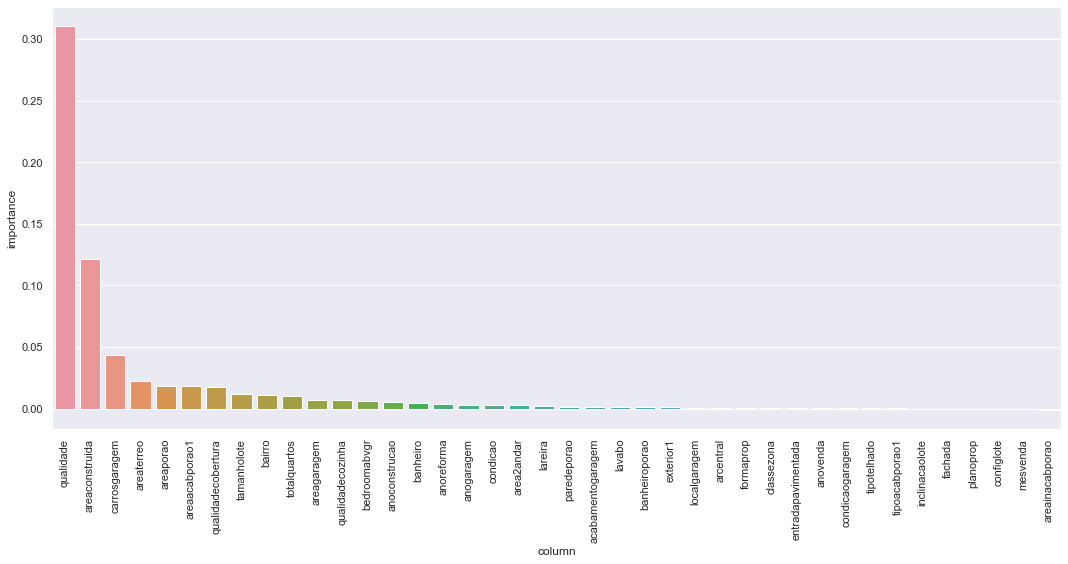

In [94]:
# Importância das melhores features no modelo final
permutation_result = permutation_importance(modelo, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

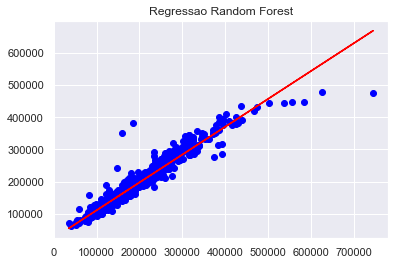

In [95]:
plt.scatter(y_train, modelo.predict(X_train[best_features]), color = 'blue')
m, b = np.polyfit(y_train, modelo.predict(X_train[best_features]), 1)
plt.plot(y_train, m*y_train + b,color ='red')
plt.title('Regressao Random Forest')
plt.show()

Vamos enviarno kaggle, para isso precisamos preparar o dataset test<br>
Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [96]:
# Vamos enviarno kaggle, para isso precisamos preparar o dataset test
test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [97]:
colunas_ingles= ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [98]:
colunas_portugues = ['id','classeimovel', 'classezona', 'fachada', 'tamanholote', 'rua',
       'formaprop', 'planoprop', 'servicos', 'configlote', 'inclinacaolote',
       'bairro', 'estrada1', 'estrada2', 'tipohabitacao', 'estilohabitacao',
       'qualidade', 'condicao', 'anoconstrucao', 'anoreforma', 'tipotelhado',
       'materialtelhado', 'exterior1', 'exterior2', 'tipoalvenaria',
       'areaalvenaria', 'qualidadecobertura', 'condicaoexterna',
       'tipofundacao', 'alturaporao', 'condicaoporao', 'paredeporao',
       'tipoacabporao1', 'areaacabporao1', 'tipoacabporao2', 'areaacabporao2',
       'areainacabporao', 'areaporao', 'aquecimento', 'qualidadeaquecimento',
       'arcentral', 'instalacaoeletrica', 'areaterreo', 'area2andar',
       'baixaqualiareaacab', 'areaconstruida', 'banheiroporao', 'lavaboporao',
       'banheiro', 'lavabo', 'bedroomabvgr', 'kitchenabvgr',
       'qualidadecozinha', 'totalquartos', 'funcionalidade', 'lareira',
       'localgaragem', 'anogaragem', 'acabamentogaragem', 'carrosgaragem',
       'areagaragem', 'qualidadegaragem', 'condicaogaragem',
       'entradapavimentada', 'areadeck', 'areavarandaaberta',
       'areavarandafechada', 'areavaranda3estacoes', 'areaalpendre',
       'areapiscina', 'valoroutros', 'mesvenda', 'anovenda', 'tipovenda',
       'condicaovenda']

In [99]:
dic_colunms = {}
for i,j in zip(colunas_ingles,colunas_portugues):
    dic_colunms[i]=j

In [100]:
test.rename(columns=dic_colunms,inplace=True)

In [101]:
variables_null = list((test.isnull().mean()[test.isnull().mean() !=0]).index)

In [102]:
[test[value].fillna(value=test['tipoalvenaria'].mode()[0], inplace=True) for value in variables_null]
test['areaalvenaria'].fillna(value=0, inplace=True)
test['tipoalvenaria'].fillna(value=test['tipoalvenaria'].mode()[0], inplace=True)

In [103]:
test.isnull().mean()[test.isnull().mean() !=0]

Series([], dtype: float64)

In [104]:
test_final = test[best_features]

In [105]:
categorical = list(test_final.dtypes[test_final.dtypes.values=='object'].index)
test_final[categorical] = test_final[categorical].astype('category')

In [106]:
#vamos utilizar o Ordinalencoder para fitar as variáveis categoricas escritas em números
test_final[categorical]= OrdinalEncoder().fit_transform(test_final[categorical].astype(str))

In [108]:
#Re-treinando o modelo apenas com as variáveis mais importantes
X = test_final
# GErando a predição e armazenado em uma variaval
y_pred = modelo.predict(X).round(2)

In [109]:
output = pd.DataFrame({"Id": test.id,
                       "SalePrice": y_pred})

In [110]:
# Save the output
output.to_csv('data/submission.csv', index=False)

In [111]:
output

,Id,SalePrice
0,1461,120084.82
1,1462,118486.13
2,1463,139629.29
3,1464,126225.08
4,1465,111446.36
...,...,...
1454,2915,112217.49
1455,2916,114618.23
1456,2917,112926.03
1457,2918,139570.93
